## Дипломный проект на курсе Data Science школа SkillFactory
# «Модель прогнозирования стоимости жилья для агентства недвижимости»

**Цель:** разработать модель, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок.

**Поставленные задачи:**
1. Провести разведывательный анализ и очистку исходных данных. Обратите внимание, что данные в таблице реальные: в результате во многих признаках присутствуют дублирующиеся категории, ошибки ввода, жаргонные сокращения и т .д. Вам предстоит отыскать закономерности, самостоятельно расшифровать все сокращения, найти синонимы в данных, обработать пропуски и удалить выбросы. 
2. Выделить наиболее значимые факторы, влияющие на стоимость недвижимости.
3. Построить модель для прогнозирования стоимости недвижимости.
4. Разработать небольшой веб-сервис, на вход которому поступают данные о некоторой выставленной на продажу недвижимости, а сервис прогнозирует его стоимость.

**Описание данных:**<br>
<br>
➔ 'status' — статус продажи;<br>
➔ 'private pool' и 'PrivatePool' — наличие собственного бассейна;<br>
➔ 'propertyType' — тип объекта недвижимости;<br>
➔ 'street' — адрес объекта;<br>
➔ 'baths' — количество ванных комнат;<br>
➔ 'homeFacts' — сведения о строительстве объекта (содержит несколько
типов сведений, влияющих на оценку объекта);<br>
➔ 'fireplace' — наличие камина;<br>
➔ 'city' — город;<br>
➔ 'schools' — сведения о школах в районе;<br>
➔ 'sqft' — площадь в футах;<br>
➔ 'zipcode' — почтовый индекс;<br>
➔ 'beds' — количество спален;<br>
➔ 'state' — штат;<br>
➔ 'stories' — количество этажей;<br>
➔ 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система
мультилистинга);<br><br>

➔ **'target'** — цена объекта недвижимости (целевой признак, который
необходимо спрогнозировать).

In [35]:
import numpy as np 
import pandas as pd

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import os

# для графиков
import seaborn as sns
import plotly.subplots as spimport
import matplotlib.pyplot as plt

# для нормализации
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor 
from category_encoders import TargetEncoder, CatBoostEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

In [4]:
# зафиусируем RANDOM_SEED
RANDOM_SEED = 45

In [5]:
# зафиксируем версию пакетов
!pip freeze > requirements.txt

## 4. Создание модели и её оценка

In [18]:
df = pd.read_csv(r'Z:\Skillfaktor\Diplom\cleaned_data_for_model.csv')
df.head(8)

,sqft,target,private_pool_all,beds_all,school_distance_min,Remodeled year_final,Heating_final,status_Active,status_Auction,status_Back on market,...,propertyType_multi family,propertyType_other,propertyType_ranch,propertyType_single family,propertyType_townhouse,propertyType_unknown,state_label,year_label,city_label,zipcode_label
0,7.972466,12.943237,False,1.386295,9.932521e-01,False,True,1,0,0,...,0,0,0,1,0,0,20,207,1384,819
1,7.574045,12.644328,False,1.098613,9.951321e-03,False,False,0,0,0,...,0,0,0,1,0,0,34,207,1393,3962
2,6.799056,12.250090,False,0.693148,9.999995e-07,False,True,0,0,0,...,0,0,0,0,1,0,27,108,1120,513
3,7.317876,12.109011,False,-13.815511,-2.231423e-01,True,True,1,0,0,...,0,1,0,0,0,0,6,194,1080,1369
4,7.565275,12.650742,False,1.098613,-5.108240e-01,False,True,0,0,0,...,0,0,0,1,0,0,30,207,662,2486
5,7.170120,13.413539,False,1.098613,-1.203969e+00,False,False,0,0,0,...,0,0,0,0,0,0,23,153,490,258
6,8.048788,12.468437,False,-13.815511,-9.162882e-01,True,True,1,0,0,...,0,1,0,0,0,0,30,203,662,2474
7,7.951207,13.171154,True,1.386295,-8.338052e-02,True,True,0,0,0,...,0,0,0,1,0,0,6,184,1108,1092


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283620 entries, 0 to 283619
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   sqft                        283620 non-null  float64
 1   target                      283620 non-null  float64
 2   private_pool_all            283620 non-null  bool   
 3   beds_all                    283620 non-null  float64
 4   school_distance_min         283620 non-null  float64
 5   Remodeled year_final        283620 non-null  bool   
 6   Heating_final               283620 non-null  bool   
 7   status_Active               283620 non-null  int64  
 8   status_Auction              283620 non-null  int64  
 9   status_Back on market       283620 non-null  int64  
 10  status_Closed               283620 non-null  int64  
 11  status_Coming soon          283620 non-null  int64  
 12  status_Contingent           283620 non-null  int64  
 13  status_For ren

### 4.1 Деление данных

In [20]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_SEED)

### 4.2 Модель с линейной регрессией LinearRegression

In [21]:
model = LinearRegression(fit_intercept=False)

# Вычисли коэффициенты регрессии
model.fit(X_train, y_train)

# Сделаем прогноз при помощи модели
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Проверяем требуемые метрики
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Просматриваем метрики
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Test Mean Squared Error: {mse_test:.2f}")
print(f"Train Mean Squared Error: {mae_train:.2f}")
print(f"Test Mean Squared Error: {mae_test:.2f}")
print(f"Train коэффициент детерминации: {r2_train:.2f}")
print(f"Test коэффициент детерминации: {r2_test:.2f}")

Train Mean Squared Error: 0.49
Test Mean Squared Error: 0.48
Train Mean Squared Error: 0.50
Test Mean Squared Error: 0.49
Train коэффициент детерминации: 0.33
Test коэффициент детерминации: 0.34


Значения метрик в тренировочных и тестовых выборках незначитьельно отличатся, что говорит об отсутствие в модели прееобученности.<br>
Значение  Mean Squared Error (далее MSE) - 0,49 высокое (стремимся к 0).<br>
Значение Mean Squared Error (lfktt MAE) - 0,5 высокое (стремимся к 0).<br>
Значение коэффициент детерминации (далее R2) - 0.34 низкое (стремимся к 1). <br>
Продолжаем работать над моделью для улучшения показателей метрик.<br>

### 4.3.1 Применим регуляризация Ridge (L2)
Попробуем улучшить модель при помощи метода Ridge регуляризации.

In [22]:
# Создем объект Ridge
ridge = Ridge(alpha = 10)
 
ridge.fit(X_train, y_train)
 
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

# Проверяем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Просматриваем метрики
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Test Mean Squared Error: {mse_test:.2f}")
print(f"Train Mean Squared Error: {mae_train:.2f}")
print(f"Test Mean Squared Error: {mae_test:.2f}")
print(f"Train коэффициент детерминации: {r2_train:.2f}")
print(f"Test коэффициент детерминации: {r2_test:.2f}")

Train Mean Squared Error: 0.49
Test Mean Squared Error: 0.48
Train Mean Squared Error: 0.50
Test Mean Squared Error: 0.49
Train коэффициент детерминации: 0.33
Test коэффициент детерминации: 0.34


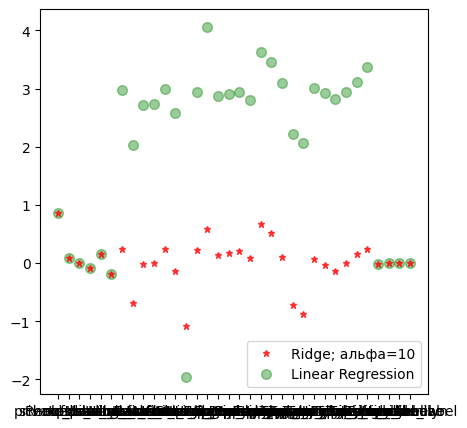

In [23]:
# Посмотрим графики весов двух моделей LinearRegression и Ridge
features = X.columns
 
plt.figure(figsize = (5, 5))
plt.plot(features, ridge.coef_, alpha=0.7, linestyle='none' , marker='*', markersize=5, color='red', label=r'Ridge; альфа=10', zorder = 7)
plt.plot(features, model.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green',label='Linear Regression')
plt.xticks(rotation = 0)
plt.legend()
plt.show()

Значения мерик не изменились... Регуляризация не помогла.<br>
Из графика видно, что веса в модели сбалансированы.<br>
Попробуем другие способы регуляризации.<br>

### 4.3.2 Применим ElacticNetCV регуляризации.

In [24]:
# Создадим и тренируем модель ElasticNetCV с кросс-валидацией по 5 фолдам
elastic = ElasticNetCV(cv=5, random_state=RANDOM_SEED)
elastic.fit(X_train, y_train)

# Прогнозы для обучающей и тестовой выборок
y_train_pred = elastic.predict(X_train)
y_test_pred = elastic.predict(X_test)

# Проверяем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Просматриваем метрики
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Test Mean Squared Error: {mse_test:.2f}")
print(f"Train Mean Squared Error: {mae_train:.2f}")
print(f"Test Mean Squared Error: {mae_test:.2f}")
print(f"Train коэффициент детерминации: {r2_train:.2f}")
print(f"Test коэффициент детерминации: {r2_test:.2f}")

Train Mean Squared Error: 0.61
Test Mean Squared Error: 0.60
Train Mean Squared Error: 0.55
Test Mean Squared Error: 0.55
Train коэффициент детерминации: 0.17
Test коэффициент детерминации: 0.17


... Значение мтерик оставляет желать лучшего, но переобучения у модели нет.
Продолжаем эксперимент


### 4.4.1 Применение RandomForestRegressor регуляризации

In [25]:
# Создаем экземпляр модели RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=RANDOM_SEED)

# Обучаем модель на обучающих данных
rf_regressor.fit(X_train, y_train)

# Прогнозы на обучающих и тестовых данных
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Проверяем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Просматриваем метрики
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Test Mean Squared Error: {mse_test:.2f}")
print(f"Train Mean Squared Error: {mae_train:.2f}")
print(f"Test Mean Squared Error: {mae_test:.2f}")
print(f"Train коэффициент детерминации: {r2_train:.2f}")
print(f"Test коэффициент детерминации: {r2_test:.2f}")

Train Mean Squared Error: 0.01
Test Mean Squared Error: 0.10
Train Mean Squared Error: 0.07
Test Mean Squared Error: 0.19
Train коэффициент детерминации: 0.98
Test коэффициент детерминации: 0.87


Ура!!! Значение метрик значительно улучшились и стали приближаться к желаемым. (MSE и MAE все ближе к 0,  а коэффициент детерминации к 1)<br>
Далее будем подбирать гиперпараметры для оптимизации.

### 4.4.2 Применение RandomizedSearchCV

In [26]:
# Создадим сетку параметров
param_distributions = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
#  Определяем гиперпараметры           
random_search_forest = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=45), 
    param_distributions=param_distributions, 
    cv=8,
    n_iter = 13, 
    n_jobs = -3
)  
%time random_search_forest.fit(X_train, y_train) 
y_train_pred = random_search_forest.predict(X_train)
y_test_pred = random_search_forest.predict(X_test)

CPU times: total: 4min 47s
Wall time: 1h 26min 35s


In [27]:
# Проверяем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Просматриваем метрики
print(f"Train Mean Squared Error: {mse_train:.2f}")
print(f"Test Mean Squared Error: {mse_test:.2f}")
print(f"Train Mean Squared Error: {mae_train:.2f}")
print(f"Test Mean Squared Error: {mae_test:.2f}")
print(f"Train коэффициент детерминации: {r2_train:.2f}")
print(f"Test коэффициент детерминации: {r2_test:.2f}")

Train Mean Squared Error: 0.06
Test Mean Squared Error: 0.11
Train Mean Squared Error: 0.15
Test Mean Squared Error: 0.21
Train коэффициент детерминации: 0.92
Test коэффициент детерминации: 0.85



Анализируя полученные метрики
Подбор оптимальных гиперпараметров позволил оставить ошибки примерно такими же низкими, как в Случайном лесе, а R2 достаточно высоким. При этом разница между трейном и тестовыми выборками меньше, а значит модель более устойчива, менее переобучена. Считаю, что в нашем случае это лучшая модель, не смотря на то, что коэффициент детерминации немного ниже (на трейне был 0,98 - стал 0,93, на тестовой выборке был в модели случайного леса 0,87 - стал 0,86).<br>
Попробуем еще одну модель CatBoostRegr.

### 4.5 CatBoostRegressor

CatBoostRegressor работает с необработанными категориальными данными. Поэтому в предыдущем коде я сохранила данные в файл без кодирования категориальных признаков, с этим файлом и будем работать в данном разделе.

In [28]:
# чтение данных без кодирования категориальных прихнаков
df = pd.read_csv(r'Z:\Skillfaktor\Diplom\cleaned_data_for_CB.csv')
df.head(8)

,status,propertyType,street,city,sqft,zipcode,state,target,private_pool_all,beds_all,school_distance_min,Year built,Remodeled year_final,Heating_final
0,Active,single family,240 Heather Ln,Southern Pines,7.972466,28387,NC,12.943237,False,1.386295,9.932521e-01,2019,False,True
1,For sale,single family,12911 E Heroy Ave,Spokane Valley,7.574045,99216,WA,12.644328,False,1.098613,9.951321e-03,2019,False,False
2,For sale,townhouse,1624 S Newkirk St,Philadelphia,6.799056,19145,PA,12.250090,False,0.693148,9.999995e-07,1920,False,True
3,Active,other,552 Casanova Ct,POINCIANA,7.317876,34759,FL,12.109011,False,-13.815511,-2.231423e-01,2006,True,True
4,unknown,single family,8612 Cedar Plains Ln,Houston,7.565275,77080,TX,12.650742,False,1.098613,-5.108240e-01,2019,False,True
5,For sale,condo,14205 Roosevelt Ave #512,Flushing,7.170120,11354,NY,13.413539,False,1.098613,-1.203969e+00,1965,False,False
6,Active,other,4222 False Cypress Ln,Houston,8.048788,77068,TX,12.468437,False,-13.815511,-9.162882e-01,2015,True,True
7,For sale,single family,16373 NW 16th St,Pembroke Pines,7.951207,33028,FL,13.171154,True,1.386295,-8.338052e-02,1996,True,True


In [29]:
# разделение данных
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_SEED)

In [37]:
# определеяем еще раз категориальные признаки
#cat_features = ['status', 'propertyType', 'street', 'zipcode', 'state', 'city', 'Year built']
#param_grid = {
#    'iterations': [100, 300, 500],
#    'learning_rate': [0.01, 0.03, 0.1],
#    'depth': [4, 6, 8],
#    'l2_leaf_reg': [1, 3, 5],
#}
#cb_model = CatBoostRegressor(random_seed=RANDOM_SEED, silent=True)
#grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
#grid_search.fit(X_train, y_train, cat_features=cat_features)
#best_params = grid_search.best_params_
#best_cb_model = CatBoostRegressor(iterations=best_params['iterations'], learning_rate=best_params['learning_rate'], depth=best_params['depth'], l2_leaf_reg=best_params['l2_leaf_reg'], random_seed=RANDOM_SEED, silent=True)
#best_cb_model.fit(X_train, y_train, cat_features=cat_features)

#y_train_pred = best_cb_model.predict(X_train)
#y_test_pred = best_cb_model.predict(X_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


При запуске модели обучения CatBoost дождаться окончания ее обучения не получилось (из-за этого код закомментирован). 

In [74]:
# Проверяем метрики
# mse_train = mean_squared_error(y_train, y_train_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)
# mae_train = mean_absolute_error(y_train, y_train_pred)
# mae_test = mean_absolute_error(y_test, y_test_pred)
# r2_train = r2_score(y_train, y_train_pred)
# r2_test = r2_score(y_test, y_test_pred)

# Просматриваем метрики
#print(f"Train Mean Squared Error: {mse_train:.2f}")
#print(f"Test Mean Squared Error: {mse_test:.2f}")
#print(f"Train Mean Squared Error: {mae_train:.2f}")
#print(f"Test Mean Squared Error: {mae_test:.2f}")
#print(f"Train коэффициент детерминации: {r2_train:.2f}")
#print(f"Test коэффициент детерминации: {r2_test:.2f}")

## *Выводы 4 части работы:*

In [73]:
# Проанализируем полученные данные
metrics = {'Metric': ['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train R2', 'Test R2'],
           'LinearRegression': [0.49, 0.48, 0.5, 0.49, 0.33, 0.34],
           'Ridge':[0.49, 0.48, 0.5, 0.49, 0.33, 0.34],
           'ElasticNetCV': [0.61, 0.6, 0.55, 0.55, 0.17, 0.17],
           'RandomForestRegressor': [0.01, 0.1, 0.07, 0.19, 0.98, 0.87],
           'RandomizedSearchCV': [0.06, 0.11, 0.15, 0.21, 0.92, 0.85],
           #'CatBoostRegressor':[0.08, 0.10, 0.20, 0.21, 0.89, 0.86]
}

metric_com = pd.DataFrame(metrics)
metric_com

,Metric,LinearRegression,Ridge,ElasticNetCV,RandomForestRegressor,RandomizedSearchCV
0,Train MSE,0.49,0.49,0.61,0.01,0.06
1,Test MSE,0.48,0.48,0.60,0.10,0.11
2,Train MAE,0.50,0.50,0.55,0.07,0.15
3,Test MAE,0.49,0.49,0.55,0.19,0.21
4,Train R2,0.33,0.33,0.17,0.98,0.92
5,Test R2,0.34,0.34,0.17,0.87,0.85


*Итоговый вывод:*

Анализируя общую таблицу, можно сказать, что наилучшая модель это RandomizedSearchCV. <br> 
Показатели ошибок MSE и MAE у неё наименьшие, коэффициент детерминации наибольший для трейновой и тестовой выборок. При этом разница между выборками у этой модели минимальная, что указывает на отсутствие её переобучения.